# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Аналитика

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Проведем дежурный осмотр датасетов, пропуски, дубликаты, выбросы. На всякий случай.

In [2]:
df1 = pd.read_csv('/datasets/query_1.csv')
df1.head()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
df1.isna().sum()

model             0
flights_amount    0
dtype: int64

In [5]:
df1.duplicated().sum()

0

In [6]:
df1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [7]:
df2 = pd.read_csv('/datasets/query_3.csv')
df2.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Среднее количество полетов приведем к int'у, т.к. величина скорее целая

In [9]:
df2['average_flights'] = df2['average_flights'].astype('int')

In [10]:
df2.isna().sum()

city               0
average_flights    0
dtype: int64

In [11]:
df2.describe()

,average_flights
count,101.000000
mean,5.217822
std,13.061090
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,129.000000


**ТОП 10 городов**

In [12]:
top10_cities = df2.sort_values('average_flights', ascending=False).head(10)

In [13]:
top10_cities

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
63,Пермь,10
67,Ростов-на-Дону,10
10,Брянск,10
84,Ульяновск,9
73,Советский,9


Лидеры рейтинга логичны, т.к. являются самыми населенными городами страны

Построим график зависимости числа рейсов от модели самолета

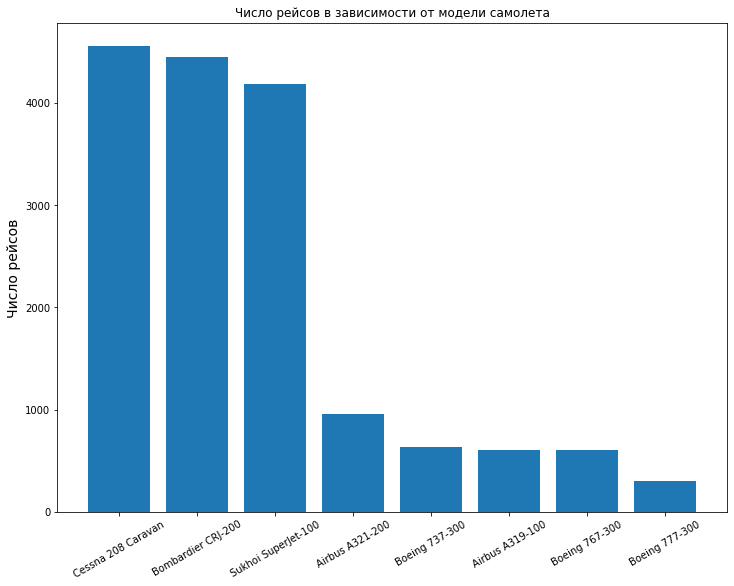

In [14]:
plot_1 = df1.sort_values('flights_amount', ascending=False)
plt.figure(figsize=(12,9))
plt.bar(plot_1['model'], plot_1['flights_amount'])
plt.xticks(rotation=30)
plt.ylabel('Число рейсов', fontsize='14')
plt.title('Число рейсов в зависимости от модели самолета')
plt.show()

*Лидирующие позиции занимают самолеты средней вместимости, удивляет первое место `cessna`, казалось бы, этот самолет предпочтителен для небольших частных владельцев в США. Бомбарди является "рабочей лошадкой в своей нише и завоевал доверие. А SSJ, несмотря на критику, постепенно набирает летную практику, а это необходимо для построения отечественнйо авиации."*

Построим график зависимости числа рейсов от города

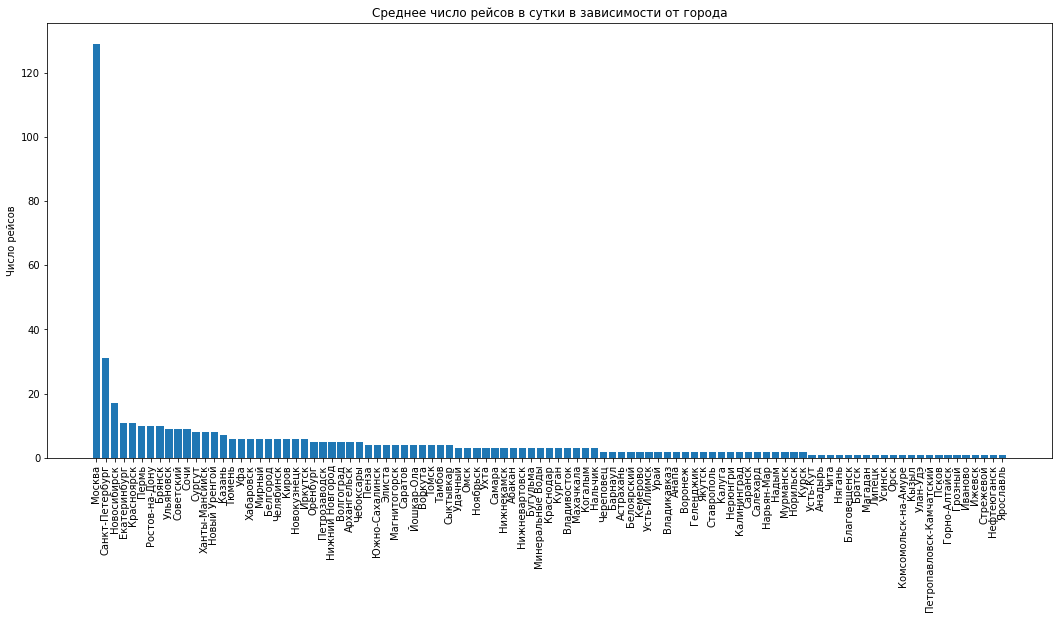

In [15]:
plot_2 = df2.sort_values(by='average_flights', ascending=False)
plt.figure(figsize=(18,8))
plt.bar(plot_2['city'], plot_2['average_flights'])
plt.xticks(rotation=90)
plt.ylabel('Число рейсов')
plt.title('Среднее число рейсов в сутки в зависимости от города')
plt.show()

Видим объяснимое лидерство Москвы. В среднем по городам, имеем 5 рейсов в сутки

In [16]:
print(df2['average_flights'].mean())
print(df2['average_flights'].median())

5.217821782178218
3.0


А медианно, всего 3

Построим график зависимости числа рейсов от города ТОП 10

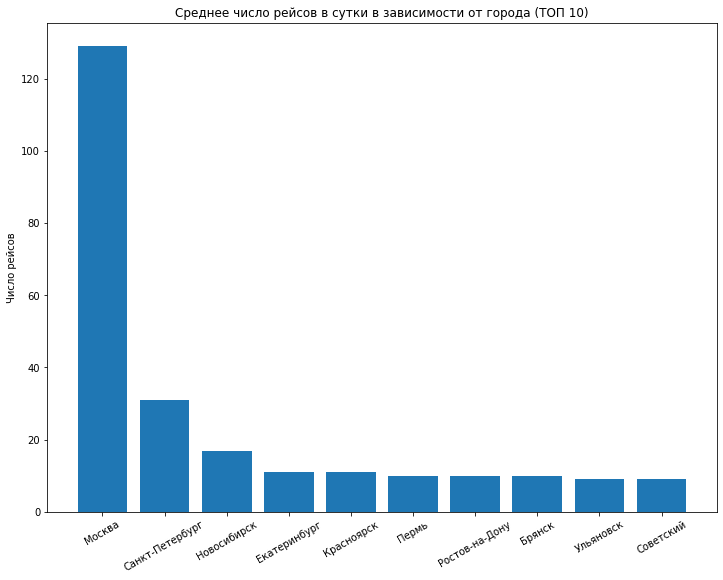

In [17]:
plt.figure(figsize=(12,9))
plt.bar(top10_cities['city'], top10_cities['average_flights'])
plt.xticks(rotation=30)
plt.ylabel('Число рейсов')
plt.title('Среднее число рейсов в сутки в зависимости от города (ТОП 10)')
plt.show()

Наблюдаем значения ТОП 10 чуть ближе к обывательскому глазу